In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = sm.datasets.fair.load_pandas().data

In [3]:
df.head()
# we need to create variable when it is eqyal to 0 or ( i mean dummy)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [17]:
#create variable, takes number and checks
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [18]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [19]:
df.groupby('Had_Affair').mean()
# in this way we find that either are cheating or not
# there is no impact of education, occupation_husb, occupation, years married
# age is bit different

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


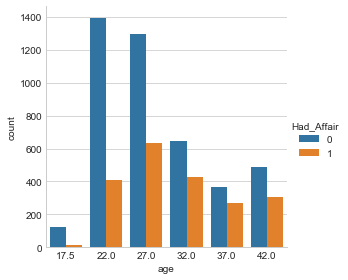

In [20]:
sns.factorplot('age',data=df,hue='Had_Affair',kind='count')
# this is frequency table

In [21]:
#Create dummies for each occupations, but if we have 6 dummies we will have multicolinerarity, 
For wscaping from multicolineratiy we will drop the one with lowest occupation
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [22]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [23]:
#
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [24]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [25]:
X = pd.concat([X,dummies],axis=1)

In [26]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [27]:
X = X.drop(['occ1','hocc1','affairs'],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [28]:
Y = df.Had_Affair

In [29]:
#Implement logistic regression using SciKit library
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

0.72588752748978946

In [30]:
#Implement using Statsmodels 
logit = sm.Logit(Y,X)

In [31]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.544549
         Iterations 6


In [32]:
print (result.summary())
# higher the rating of marriage lower propapbility of cheating
#they are statistically significant with respect to occupation 1
#comparatively likely (both can have very low probability  )

                           Logit Regression Results                           
Dep. Variable:             Had_Affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6350
Method:                           MLE   Df Model:                           15
Date:                Wed, 11 Apr 2018   Pseudo R-squ.:                  0.1339
Time:                        11:18:55   Log-Likelihood:                -3466.6
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                5.253e-219
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
rate_marriage    -0.6859      0.031    -22.092      0.000      -0.747      -0.625
age              -0.0518      0.010     -5.114      0.000      -0.072      -0.032
yrs_married       0.0996      0.011     

In [34]:
# odds ratios only
#people in occupation 2 lie 13 times more than people in occupation 1
#probability of ocupation 2 is 13 times larger than probability of occupation 1
print (np.exp(result.params))

rate_marriage     0.503634
age               0.949517
yrs_married       1.104778
children          1.022323
religious         0.694814
educ              1.021770
occ2             13.049498
occ3             17.724880
occ4             13.177142
occ5             24.615253
occ6             23.642860
hocc2             1.414364
hocc3             1.576136
hocc4             1.368775
hocc5             1.389879
hocc6             1.375617
dtype: float64
